In [1]:
from models.TernausNet import *

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [3]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/manifest-1557326747206/LCTSC/imgs_256_full.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/manifest-1557326747206/LCTSC/masks_256_full.npy")


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [4]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(5719, 256, 256, 1) (5719, 256, 256, 5)


In [4]:
del images
del labels

In [6]:
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, learning_rate = 2e-4, path = "saved_models/ternausnet_full_imgs2")
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
______________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
715/715 [==============================] - 4237s 6s/step - loss: 5.5054 - dice_coef_multilabel: 0.0231 - iou_multilabel: 0.0123 - val_loss: 0.1607 - val_dice_coef_multilabel: 0.1856 - val_iou_multilabel: 0.1026
INFO:tensorflow:Assets written to: saved_models/ternausnet_full_imgs2/assets
Epoch 2/100
715/715 [==============================] - 4237s 6s/step - loss: 0.0935 - dice_coef_multilabel: 0.3037 - iou_multilabel: 0.1856 - val_loss: 0.0519 - val_dice_coef_multilabel: 0.6066 - val_iou_multilabel: 0.4378
INFO:tensorflow:Assets written to: saved_models/ternausnet_full_imgs2/assets
Epoch 3/100
715/715 [==============================] - 4235s 6s/step - loss: 0.0513 - dice_coef_multilabel: 0.5997 - iou_multilabel: 0.4325 - val_loss: 0.0405 - val_dice_coef_multilabel: 0.6647 - val_iou_multilabel: 0.5013
INFO:tensorflow:Assets written to: saved_models/ternausnet_full_imgs2/assets
Epoch 4/100
715/715 [==============================] - 4233s 6s/step - loss: 0.1322 - dice_coef_mult

Epoch 33/100
715/715 [==============================] - 4546s 6s/step - loss: 0.0037 - dice_coef_multilabel: 0.8840 - iou_multilabel: 0.7958 - val_loss: 0.0072 - val_dice_coef_multilabel: 0.8210 - val_iou_multilabel: 0.6995
Epoch 34/100
715/715 [==============================] - 4741s 7s/step - loss: 0.0031 - dice_coef_multilabel: 0.8829 - iou_multilabel: 0.7936 - val_loss: 0.0069 - val_dice_coef_multilabel: 0.7898 - val_iou_multilabel: 0.6553
Epoch 35/100
715/715 [==============================] - 4375s 6s/step - loss: 0.0033 - dice_coef_multilabel: 0.8918 - iou_multilabel: 0.8091 - val_loss: 0.0034 - val_dice_coef_multilabel: 0.8906 - val_iou_multilabel: 0.8040
Epoch 36/100
715/715 [==============================] - 4363s 6s/step - loss: 0.0020 - dice_coef_multilabel: 0.9109 - iou_multilabel: 0.8372 - val_loss: 0.0055 - val_dice_coef_multilabel: 0.8610 - val_iou_multilabel: 0.7576
Epoch 37/100
715/715 [==============================] - 4318s 6s/step - loss: 0.0030 - dice_coef_multila

In [5]:
loaded_model = tf.keras.models.load_model('saved_models/ternausnet_full_imgs2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

In [ ]:
preds = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds, 5).numpy())


In [6]:
preds = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.9184445
TEST IoU:  0.8575779


In [36]:
import statistics
import numpy
t = [0.90, 0.98,0.98, 0.95, 0.78]
print(len(t))
x = numpy.std(t)
print(x)
x = statistics.mean(t)
print(x)

5
0.07493997598078077
0.918


In [7]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.8976664 0.8143328
TEST DICE_COEF, IOU Left lung:  0.9812589 0.96320736
TEST DICE_COEF, IOU Right lung:  0.9815507 0.96376985
TEST DICE_COEF, IOU Heart:  0.9502634 0.9052398
TEST DICE_COEF, IOU Esophagus:  0.78148305 0.64133954


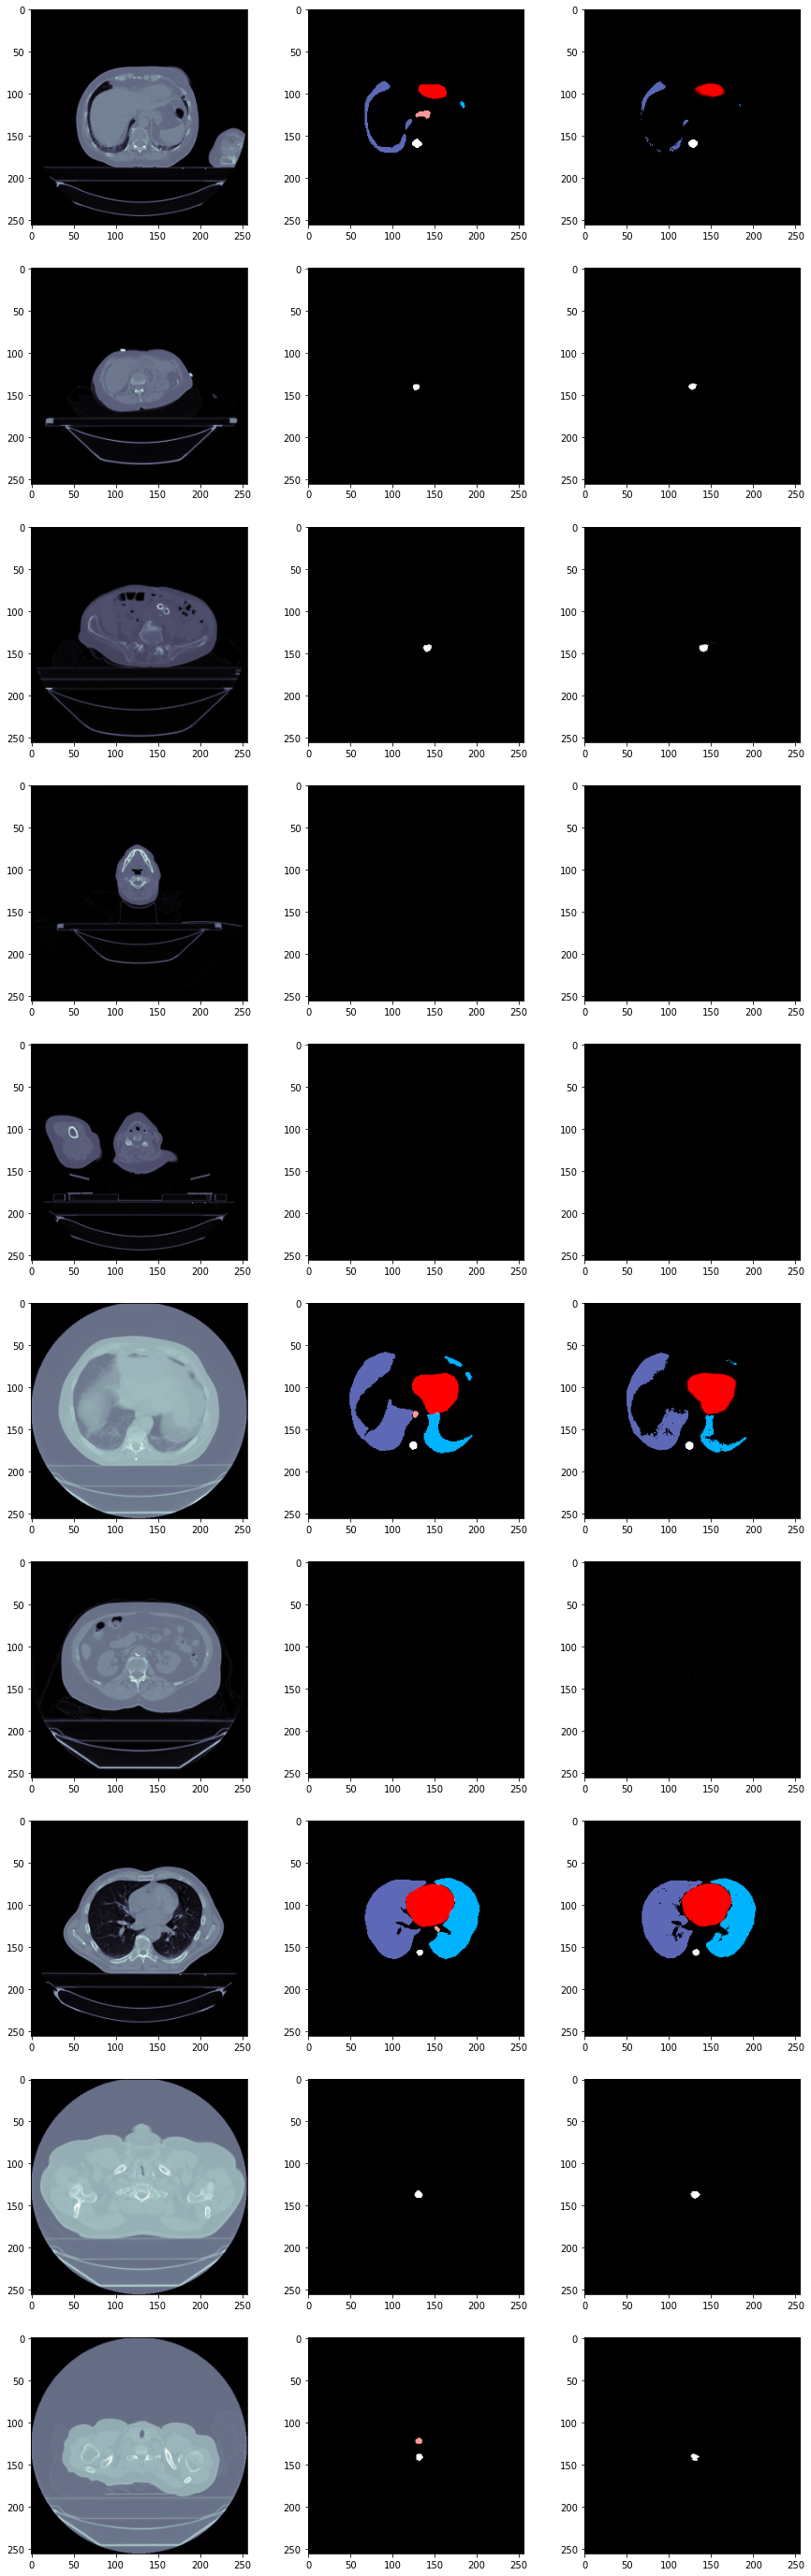

In [8]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

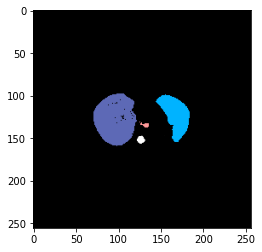

In [48]:
plt.imshow(combine_mask(preds[142]))

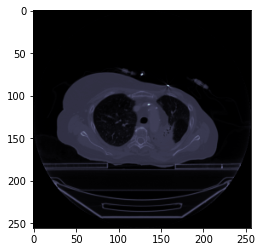

In [49]:
plt.imshow(x_test[142].squeeze(), cmap=plt.cm.bone)

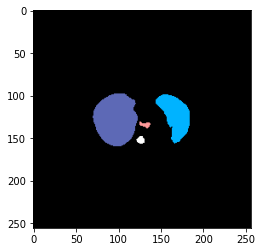

In [50]:
plt.imshow(combine_mask(y_test[142]))